In [63]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [64]:
TRAIN_DIR = "/Users/akd/Facial Expressions/images/train/"
TEST_DIR = "/Users/akd/Facial Expressions/images/validation/"
BATCH_SIZE=64

In [65]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 7164 in folder happy
For training data, found 0 in folder .DS_Store
For training data, found 4938 in folder sad
For training data, found 4103 in folder fear
For training data, found 3205 in folder surprise
For training data, found 4982 in folder neutral
For training data, found 3993 in folder angry
For training data, found 436 in folder disgust


In [66]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 1825 in folder happy
For testing data, found 0 in folder .DS_Store
For testing data, found 1139 in folder sad
For testing data, found 1018 in folder fear
For testing data, found 797 in folder surprise
For testing data, found 1216 in folder neutral
For testing data, found 960 in folder angry
For testing data, found 111 in folder disgust


In [67]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [68]:
class_names = ['angry','disgust','fear','happy','neutral','sad','surprise']

Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)


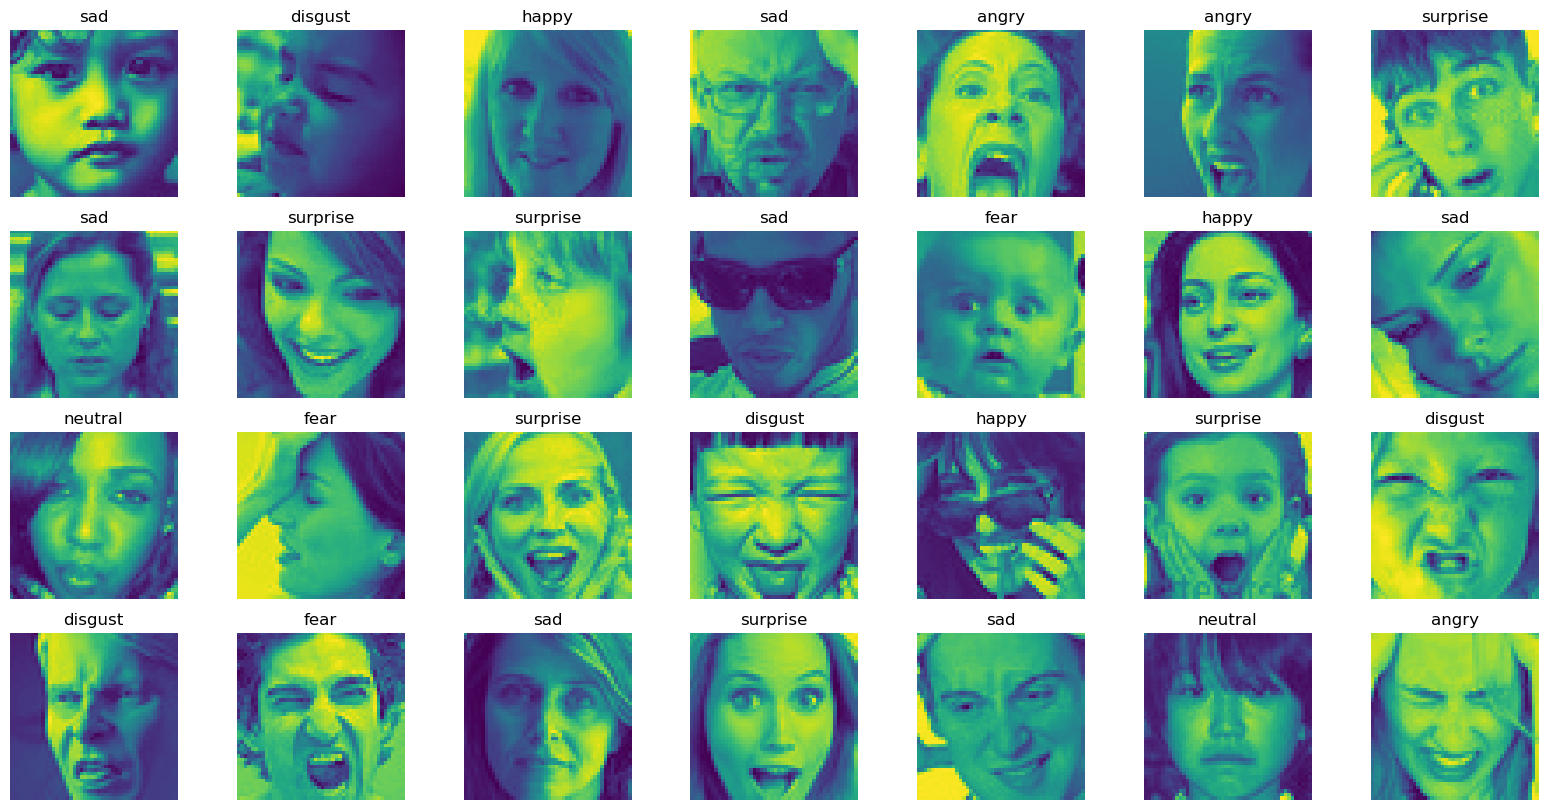

In [69]:
plt.figure(figsize=(20,10))
for i in range(28):
    plt.subplot(4, 7, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/Users/akd/Facial Expressions/images/train/", target_class=class_name)

In [70]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [74]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 7, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [75]:
## model summary
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 28800)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [76]:
history = classifier.fit(training_set,
                         epochs = 50,
                         validation_data = test_set)


classifier.save('model1.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/50
451/451 [==============================] - 143s 315ms/step - loss: 1.6593 - accuracy: 0.3477 - val_loss: 1.4983 - val_accuracy: 0.4243
Epoch 2/50
451/451 [==============================] - 151s 334ms/step - loss: 1.4856 - accuracy: 0.4265 - val_loss: 1.4050 - val_accuracy: 0.4629
Epoch 3/50
451/451 [==============================] - 155s 344ms/step - loss: 1.4010 - accuracy: 0.4594 - val_loss: 1.3440 - val_accuracy: 0.4825
Epoch 4/50
451/451 [==============================] - 157s 348ms/step - loss: 1.3405 - accuracy: 0.4859 - val_loss: 1.3275 - val_accuracy: 0.4919
Epoch 5/50
451/451 [==============================] - 158s 350ms/step - loss: 1.3053 - accuracy: 0.4976 - val_loss: 1.3133 - val_accuracy: 0.4926
Epoch 6/50
451/451 [==============================] - 168s 372ms/step - loss: 1.2765 - accuracy: 0.5107 - val_loss: 1.2900 - val_accuracy: 0.5052
Epoch 7/50
451/451 [==============================] - 165s 364ms/step - loss: 1.2508 - accuracy: 0.5233 - val_loss: 1.2762 -

In [77]:
classifier.evaluate(test_set)

111/111 [==============================] - 6s 53ms/step - loss: 1.4179 - accuracy: 0.5425


[1.417880892753601, 0.542456865310669]

Text(0, 0.5, 'Loss')

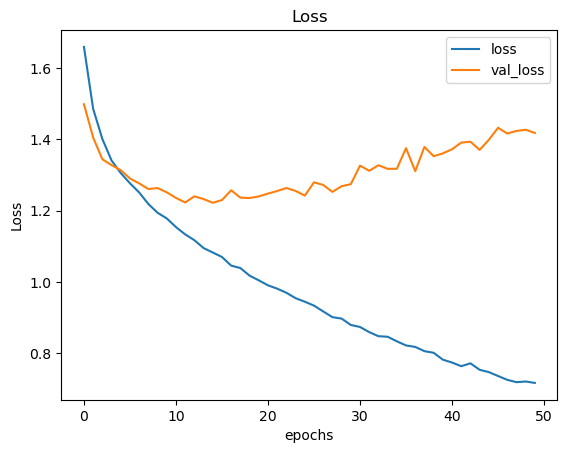

In [79]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

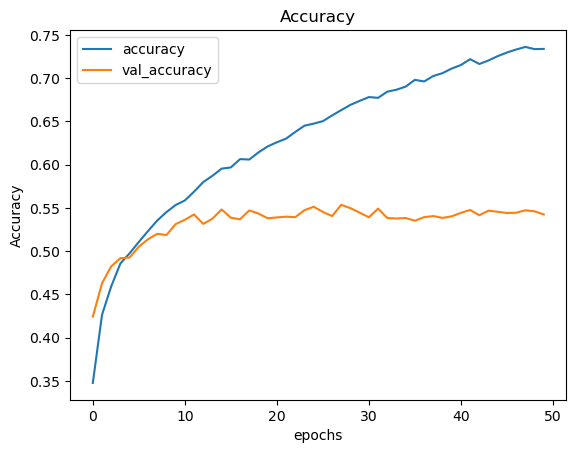

In [80]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [82]:
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread("/Users/akd/Facial Expressions/images/train/disgust/299.jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result

1/1 [==============================] - 0s 100ms/step


1

In [83]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}